<a href="https://colab.research.google.com/github/ab2757/MMWML/blob/master/Stock_Prediction_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import libraries

import pandas as pd
import datetime
import numpy as np
from pandas import Series, DataFrame
import pandas_datareader.data as web

In [0]:
# Enter the Start date and End date

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 10, 5)

print("start date : ",start)
print("end date : ",end)

start date :  2018-01-01 00:00:00
end date :  2019-10-05 00:00:00


In [0]:
# Enter Stock Symbol for prediction 

stock_ticker = "TSLA"
df = web.DataReader(stock_ticker, 'yahoo', start, end)
print(df.head())
print(df.tail())

                  High         Low        Open       Close   Volume   Adj Close
Date                                                                           
2018-01-02  322.109985  311.000000  312.000000  320.529999  4352200  320.529999
2018-01-03  325.250000  315.549988  321.000000  317.250000  4521500  317.250000
2018-01-04  318.549988  305.679993  312.869995  314.619995  9946300  314.619995
2018-01-05  317.239990  312.000000  316.619995  316.579987  4591200  316.579987
2018-01-08  337.019989  315.500000  316.000000  336.410004  9859400  336.410004
                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2019-09-30  243.979996  236.110001  ...   5879800  240.869995
2019-10-01  245.949997  239.130005  ...   6162600  244.690002
2019-10-02  244.649994  239.429993  ...   5631400  243.130005
2019-10-03  234.479996  224.279999  ...  15084500  233.029999
2019-10-04  234.720001  228.089996  ...   8021180  231.429993

[5 ro

In [0]:
print(df.shape)

(443, 6)


In [0]:
# Edit forecast_col, window_length and Run the code to create the data
forecast_col = 'Close'
df1 = df[forecast_col]
window_length = 10

start = 1
for lag in range(0,window_length+1):
  shift_col = pd.Series(df1.shift(lag))
  if(start == 1):
    data = pd.DataFrame(shift_col)
    data.columns = ['shift_'+str(lag)]
    start = 0
  else:
    shift_col = pd.DataFrame(shift_col)
    shift_col.columns = ['shift_'+str(lag)]    
    data = pd.concat([data,shift_col],axis=1)
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.head())

(443, 11)
(433, 11)
               shift_0     shift_1  ...     shift_9    shift_10
Date                                ...                        
2018-01-17  347.160004  340.059998  ...  317.250000  320.529999
2018-01-18  344.570007  347.160004  ...  314.619995  317.250000
2018-01-19  350.019989  344.570007  ...  316.579987  314.619995
2018-01-22  351.559998  350.019989  ...  336.410004  316.579987
2018-01-23  352.790009  351.559998  ...  333.690002  336.410004

[5 rows x 11 columns]


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error

In [0]:
split_ratio = 0.7
split_index = int(len(data)*split_ratio)
print(split_index)

303


In [0]:
X = data.drop('shift_0',axis=1)
y = data['shift_0']

In [0]:
X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(303, 10) (303,)
(130, 10) (130,)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(16, 6))
mpl.__version__

# Adjusting the style of matplotlib
style.use('fivethirtyeight')

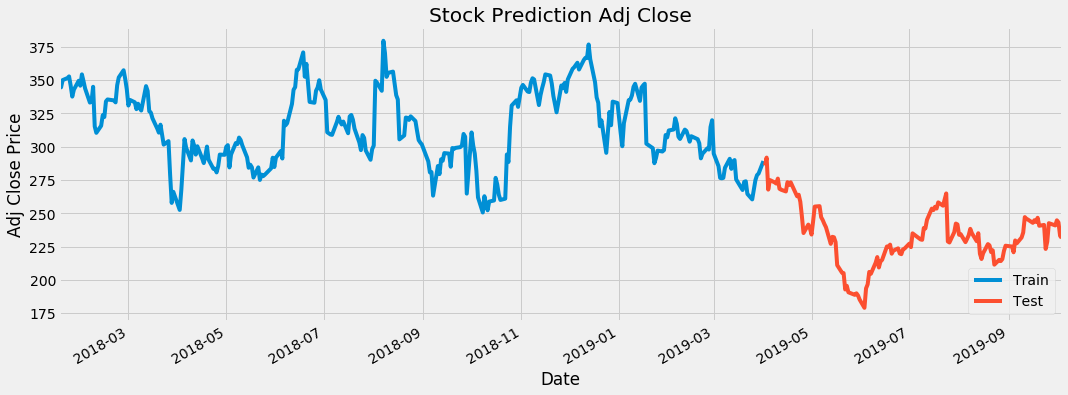

In [0]:
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Stock Prediction Adj Close')
plt.show()

In [0]:
def plot_test_forecast(y_test,forecast):
  #y_train.plot(label='Train')
  y_test.plot(label='Test')
  forecast.plot(label='Forecast')
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Adj Close Price')
  plt.title('Stock Prediction Adj Close')
  plt.show()

The linear regression confidence is  0.8032738901094019
Root Mean Squared Error:  9.695605029114722


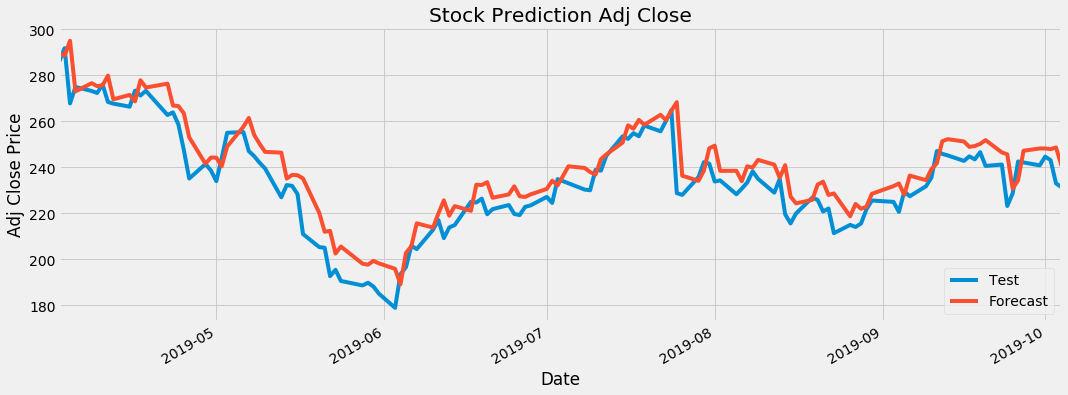

In [0]:
# Linear regression
clfreg = LinearRegression()
clfreg.fit(X_train, y_train)

confidencereg = clfreg.score(X_test, y_test)
y_pred_reg = clfreg.predict(X_test)

# results
print('The linear regression confidence is ', confidencereg)
mse = mean_squared_error(y_test, y_pred_reg)
print("Root Mean Squared Error: ", np.sqrt(mse))

forecast_reg = pd.Series(y_pred_reg)
forecast_reg.index = y_test.index

plot_test_forecast(y_test,forecast_reg)

The quadratic regression 2 confidence is  0.6876597335876768
Root Mean Squared Error:  12.21681229964166


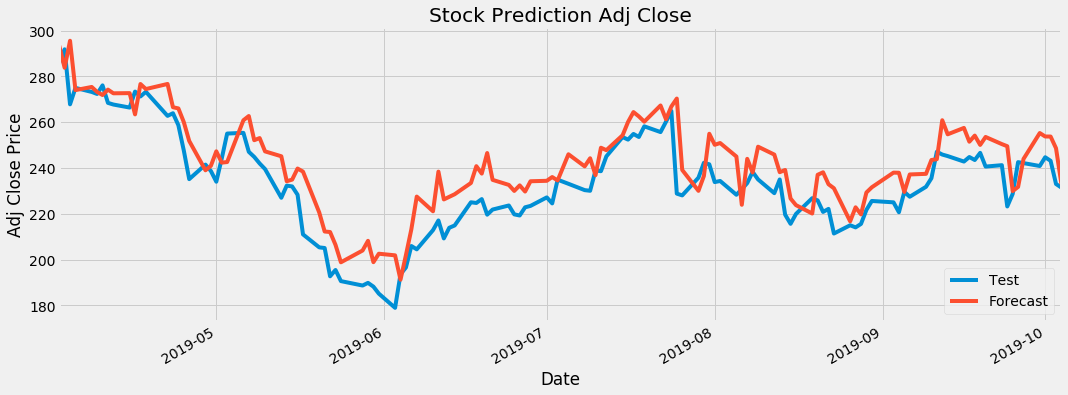

In [0]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

confidencepoly2 = clfpoly2.score(X_test,y_test)
y_pred_poly2 = clfpoly2.predict(X_test)

# results
print('The quadratic regression 2 confidence is ', confidencepoly2)
mse = mean_squared_error(y_test, y_pred_poly2)
print("Root Mean Squared Error: ", np.sqrt(mse))

forecast_poly2 = pd.Series(y_pred_poly2)
forecast_poly2.index = y_test.index

plot_test_forecast(y_test,forecast_poly2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77474e-19): result may not be accurate.
  overwrite_a=True).T


The quadratic regression 3 confidence is  -11.420618101978834
Root Mean Squared Error:  77.03986578848135


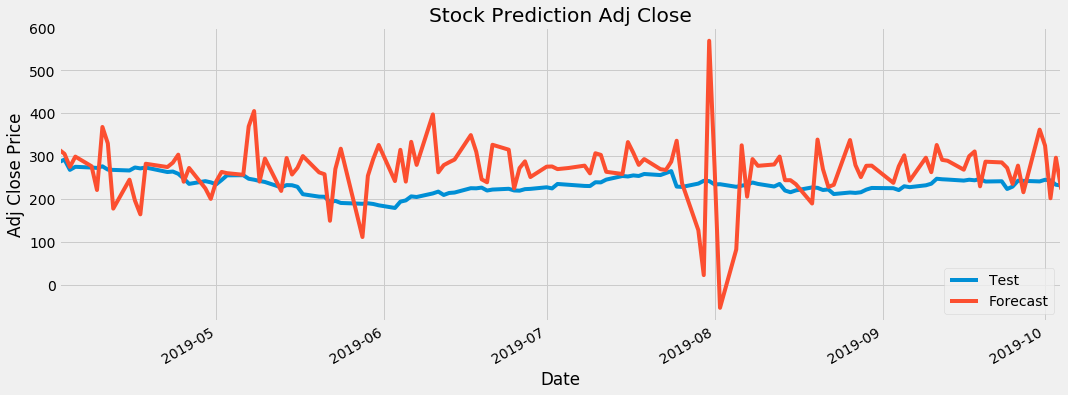

In [0]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

confidencepoly3 = clfpoly3.score(X_test,y_test)
y_pred_poly3 = clfpoly3.predict(X_test)

# results
print('The quadratic regression 3 confidence is ', confidencepoly3)
mse = mean_squared_error(y_test, y_pred_poly3)
print("Root Mean Squared Error: ", np.sqrt(mse))

forecast_poly3 = pd.Series(y_pred_poly3)
forecast_poly3.index = y_test.index

plot_test_forecast(y_test,forecast_poly3)

The knn regression confidence is  -2.154556840805464
Root Mean Squared Error:  38.82514548525235


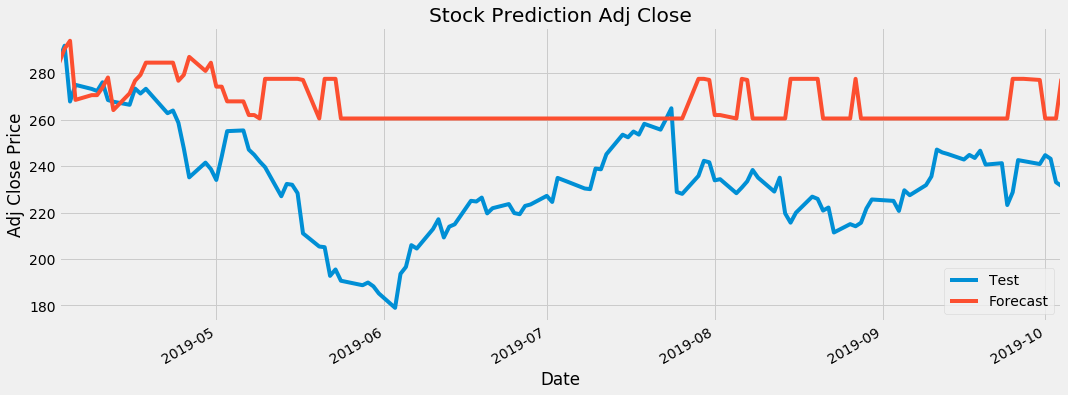

In [0]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

confidenceknn = clfknn.score(X_test, y_test)
y_pred_knn = clfknn.predict(X_test)

# results
print('The knn regression confidence is ', confidenceknn)
mse = mean_squared_error(y_test, y_pred_knn)
print("Root Mean Squared Error: ", np.sqrt(mse))

forecast_knn = pd.Series(y_pred_knn)
forecast_knn.index = y_test.index

plot_test_forecast(y_test,forecast_knn)

The knn regression confidence is  -3.1049340611219476
Root Mean Squared Error:  44.28911537548456


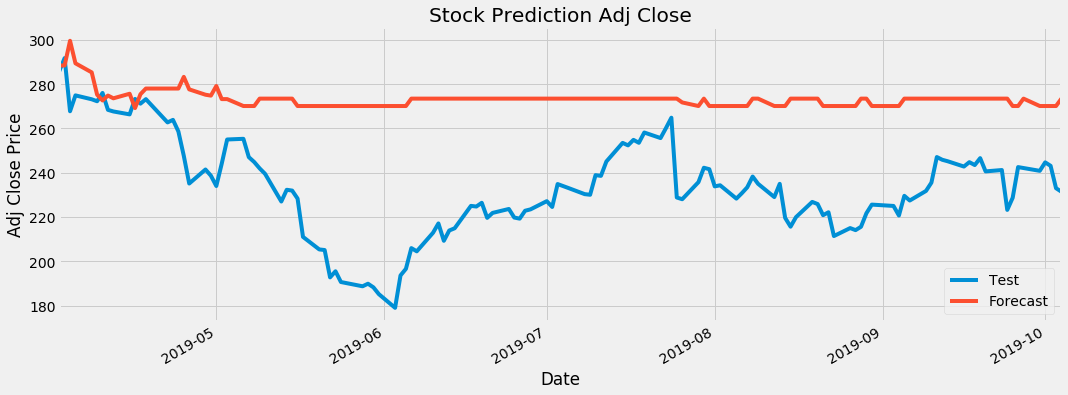

In [0]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=5)
clfknn.fit(X_train, y_train)

confidenceknn = clfknn.score(X_test, y_test)
y_pred_knn = clfknn.predict(X_test)

# results
print('The knn regression confidence is ', confidenceknn)
mse = mean_squared_error(y_test, y_pred_knn)
print("Root Mean Squared Error: ", np.sqrt(mse))

forecast_knn = pd.Series(y_pred_knn)
forecast_knn.index = y_test.index

plot_test_forecast(y_test,forecast_knn)